In [1]:
#import pandas
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import welch
import pandas as pd
import seaborn
import numpy as np
from matplotlib.colors import LogNorm
%matplotlib inline

Samples = 201
Duration = 0.8

DELTA = (0,4)
THETA = (4,8)
ALPHA = (8,13)
BETA = (13,30)
GAMMA = (30,100)    

In [2]:
p01 = "/Users/lmatayoshi/Desktop/EEG/P01.mat"
p02 = "/Users/lmatayoshi/Desktop/EEG/P02.mat"
s01 = "/Users/lmatayoshi/Desktop/EEG/S01.mat"
s02 = "/Users/lmatayoshi/Desktop/EEG/S02.mat"


In [18]:
sujeto_matrix = sio.loadmat(p01)
sujeto_matrix = sujeto_matrix['data']

In [19]:
sujeto_matrix.shape

(894, 256, 201)

In [ ]:
# Listado experimentos
#epoca_promedio_x_electrodo(p01, 8)
#epoca_promedio_por_electrodo_2(p01)
#potencia_por_epoca(p01)
#potencia_por_canal(p01)
#bandas_frecuencia(p01)

# Análisis preliminar

In [11]:
def epoca_promedio_x_electrodo(sujeto, electrodo):
    #filename = sujeto
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    electrodo_matrix = sujeto_matrix[:, electrodo, :]
    plt.plot(np.linspace(-200.0,600.0,Samples),electrodo_matrix.mean(axis=0))
    plt.xlabel("time(ms)")
    plt.ylabel("uV")
    plt.axvline(x=0, linestyle='--', color='black', linewidth=0.5)

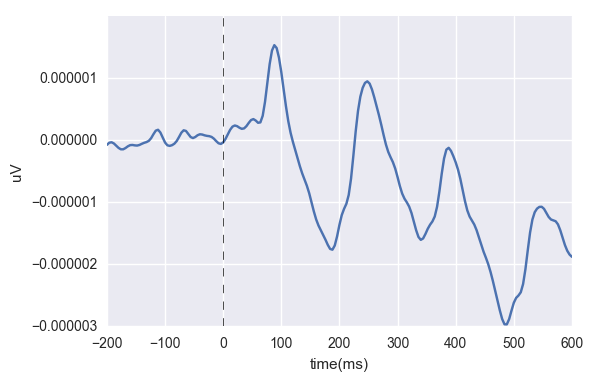

In [15]:
epoca_promedio_x_electrodo(p01, 8)

In [169]:
def epoca_promedio_por_electrodo_2(sujeto):
    electrodes = [8, 80, 44, 185, 131]
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    
    electrodo_8_matrix = sujeto_matrix[:, 8, :]
    electrodo_44_matrix = sujeto_matrix[:,44, :]
    electrodo_80_matrix = sujeto_matrix[:, 80, :]
    electrodo_131_matrix = sujeto_matrix[:, 131, :]
    electrodo_185_matrix = sujeto_matrix[:, 185, :]
    
    plot_ej2(electrodo_8_matrix)
    plot_ej2(electrodo_80_matrix)
    plot_ej2(electrodo_44_matrix)
    plot_ej2(electrodo_185_matrix)
    plot_ej2(electrodo_131_matrix)
    plt.show()

In [165]:
def plot_ej2(electrodo_i_matrix, linestyle="-", linewidth=1):
    '''Esta funcion grafica el promedio entre epochs para cada muestra (1er muestra, primer medición 
    y %entre primeras epochs, la ultima muestra es la última medicion y % entre ultimas epochs )'''
    xs = electrodo_i_matrix.shape[1]
    plt.plot(range(0,xs), electrodo_i_matrix.mean(axis=0), linestyle=linestyle)

In [16]:
def canal_promediado_por_epoca(sujeto, electrodo, linestyle="-", linewidth=1):
    '''Esta funcion gráfica el  promedio del voltaje de cada muestra por epoch en un electrodo'''
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    electrodo_matrix = sujeto_matrix[:, electrodo, :]
    xs = electrodo_matrix.shape[0]
    plt.xlabel("epoch")
    plt.ylabel("uV")
    plt.bar(range(0,xs), electrodo_matrix.mean(axis=1), linestyle=linestyle)

# Ejercicio 1

## Análisis de frecuencias

In [36]:
def potencia_por_epoca(sujeto, max_frec):
    electrodes = [8, 44, 80, 131, 185]
    cant_frec = 195
    f, Pxx = welch_electrode_mean(sujeto, electrodes)
    
    xs = []
    for j in range(0,len(f)):
        if(f[j]>max_frec):
            xs.append(j);
            break;
    max_index = xs[0]
    
    y_labels = ["{0:.2f}".format(f_i) for f_i in f]
    pxx_dataframe = pd.DataFrame(Pxx[:, :max_index], columns=y_labels[:max_index])
    grafico_heatmap(pxx_dataframe)


In [33]:
def grafico_heatmap(frecuencies):
    frecuencies = frecuencies.T
    ax=seaborn.heatmap(
        frecuencies,
        norm=LogNorm(vmin=frecuencies.min(), vmax=frecuencies.max()),
        xticklabels=100,
        yticklabels=20
    )
    plt.show()

In [34]:
def welch_electrode_mean(sujeto, electrodes):
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    m1 = sujeto_matrix[:, electrodes, :]
    mean_m1 = np.mean(m1, axis=1)
    f, Pxx = welch(mean_m1, float(Samples/Duration), nfft=1025)
    #f, Pxx = welch(mean_m1)#, float(Samples/Duration))#, nfft=Samples)
    return f, Pxx
    

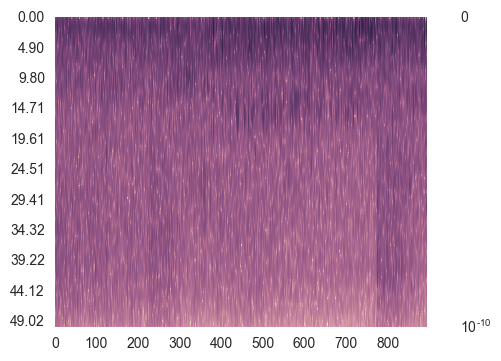

In [35]:
potencia_por_epoca(p01, 50)

## A2

In [162]:
def potencia_por_canal(sujeto):
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    frecs = []
    for i in range(0,255):
        f, Pxx = powers_welch_by_epoch(sujeto_matrix, i)
        Pxx = Pxx
        frec = Pxx.mean(0)
        frecs.append(frec)
    #plt.figure(figsize=(20,12))
    for i in range(0,255):
        plt.plot(f,frecs[i])

In [144]:
def powers_welch_by_epoch(sujeto_matrix, electrode):
    '''para un electrodo, cada epoch(todas sus muetras) calculamos welch, 
    es decir todas las frecuencias y sus potencias'''
    #for i in range (0,894):
    elec_x_frec = sujeto_matrix[:, electrode, :]
    f, Pxx = welch(elec_x_frec, float(Samples/0.8), nfft=1025)
    return f,Pxx

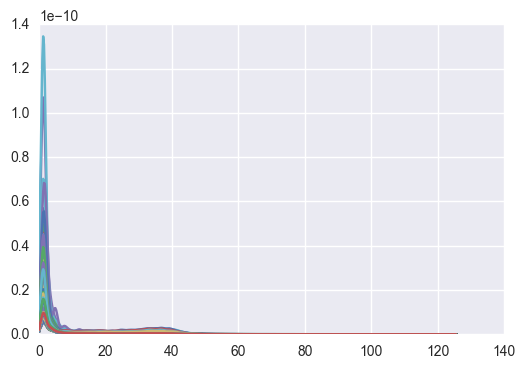

In [163]:
potencia_por_canal(p01)

## 2b

In [208]:
def bandas_frecuencia(sujeto): 
    sujeto_matrix = sio.loadmat(sujeto)
    sujeto_matrix = sujeto_matrix['data']
    mean_epoch = np.mean(sujeto_matrix, axis=0)
    f, Pxx = welch(mean_epoch, float(Samples/Duration), nfft=1025)
    electrodes_power_mean = np.mean(Pxx, axis=0)
    
    xs = []
    for i in [DELTA[1],THETA[1],ALPHA[1],BETA[1]]:
        for j in range(0,len(f)):
            if(f[j]>i):
                xs.append(j);
                break;
                
    Delta = np.mean(electrodes_power_mean[0:xs[0]])
    Theta = np.mean(electrodes_power_mean[xs[0]:xs[1]])
    Alpha =np.mean(electrodes_power_mean[xs[1]:xs[2]])
    Beta =np.mean(electrodes_power_mean[xs[2]:xs[3]])
    Gamma =np.mean(electrodes_power_mean[xs[3]:])
    
    res = [Delta, Theta, Alpha, Beta, Gamma]
    plt.bar(range(len(res)), [Delta, Theta, Alpha, Beta, Gamma])
    plt.show()

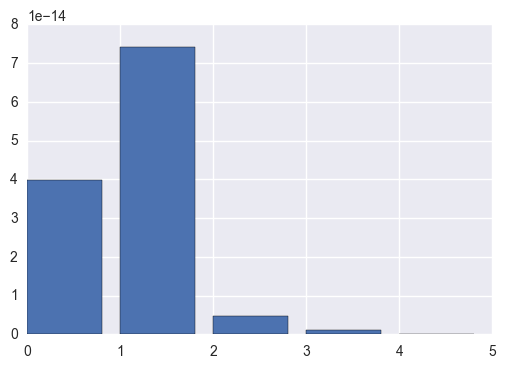

In [201]:
bandas_frecuencia(p01)

# Sujeto 2

In [3]:
# Listado experimentos
#epoca_promedio_x_electrodo(s01, 8)
#epoca_promedio_por_electrodo_2(s01)
potencia_por_epoca(s02,50)
#potencia_por_epoca(p02, 50)
#potencia_por_canal(s01)
#bandas_frecuencia(s01)

NameError: name 'potencia_por_epoca' is not defined

In [274]:
def bandas_alpha_sujetos(sujetos_S, sujetos_P): 
    # Primero promediamos por época porque varían por sujeto
    sujetos_S_list = []
    sujetos_P_list = []
    for sujeto_S in sujetos_S:
        sujeto_S = sio.loadmat(sujeto_S)['data']
        sujetos_S_list.append(np.mean(sujeto_S, axis= 0))
    for sujeto_P in sujetos_P:
        sujeto_P = sio.loadmat(sujeto_P)['data']
        sujetos_P_list.append(np.mean(sujeto_P, axis= 0))
    
    #sujetos_S_matrix = sio.loadmat(sujeto1)
    #sujetos_S_matrix = sujetos_S_matrix['data']
    #sujetos_P_matrix = sio.loadmat(sujeto2)
    #sujetos_P_matrix = sujetos_P_matrix['data']
    
    sujetos_S_list = np.array(sujetos_S_list)
    sujetos_P_list = np.array(sujetos_P_list)
    mean_sujetos_S_matrix =np.mean(sujetos_S_list, axis=0)
    mean_sujetos_P_matrix =np.mean(sujetos_P_list, axis=0)
    
    #print mean_sujetos_S_matrix.shape
    #print mean_sujetos_P_matrix.shape

    f_S, Pxx_S = welch(mean_sujetos_S_matrix, float(Samples/Duration), nfft=1025)
    electrodes_S_power_mean = np.mean(Pxx_S, axis=0)

    f_P, Pxx_P = welch(mean_sujetos_P_matrix, float(Samples/Duration), nfft=1025)
    electrodes_P_power_mean = np.mean(Pxx_P, axis=0)
    
    bandas_S = []
    bandas_P = []
    for i in [DELTA[1],THETA[1],ALPHA[1],BETA[1]]:
        for j in range(0,len(f_S)):
            if(f_S[j]>i):
                bandas_S.append(j);       
                break;    
    for i in [DELTA[1],THETA[1],ALPHA[1],BETA[1]]:
        for j in range(0,len(f_P)):
            if(f_P[j]>i):
                bandas_P.append(j);       
                break;            
    Delta_S = np.mean(electrodes_S_power_mean[0:bandas_S[0]])
    Theta_S = np.mean(electrodes_S_power_mean[bandas_S[0]:bandas_S[1]])
    Alpha_S =np.mean(electrodes_S_power_mean[bandas_S[1]:bandas_S[2]])
    Beta_S =np.mean(electrodes_S_power_mean[bandas_S[2]:bandas_S[3]])
    Gamma_S =np.mean(electrodes_S_power_mean[bandas_S[3]:])
    
    Delta_P = np.mean(electrodes_P_power_mean[0:bandas_P[0]])
    Theta_P = np.mean(electrodes_P_power_mean[bandas_P[0]:bandas_P[1]])
    Alpha_P =np.mean(electrodes_P_power_mean[bandas_P[1]:bandas_P[2]])
    Beta_P =np.mean(electrodes_P_power_mean[bandas_P[2]:bandas_P[3]])
    Gamma_P =np.mean(electrodes_P_power_mean[bandas_P[3]:])
    
    Alpha_S_array = electrodes_S_power_mean[bandas_S[1]:bandas_S[2]]
    Alpha_P_array = electrodes_P_power_mean[bandas_P[1]:bandas_P[2]]
    
    return Alpha_S_array, Alpha_P_array

In [275]:
alpha_s_array, alpha_p_array = bandas_alpha_sujetos([s01, s02],[p01,p02])

In [278]:
print np.(alpha_s_array)
print np.std(alpha_p_array)

5.23243868264e-15
1.64165870273e-15


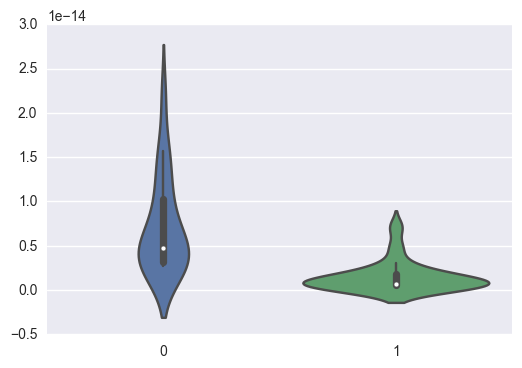

In [300]:
#seaborn.violinplot(alpha_s_array)
#seaborn.violinplot(alpha_p_array, color="red")
#tips = ["Sanos", "Patologicos"]
seaborn.violinplot(data= (alpha_s_array,alpha_p_array), split=True)